In [2]:
import os 
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from causalimpact import CausalImpact

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


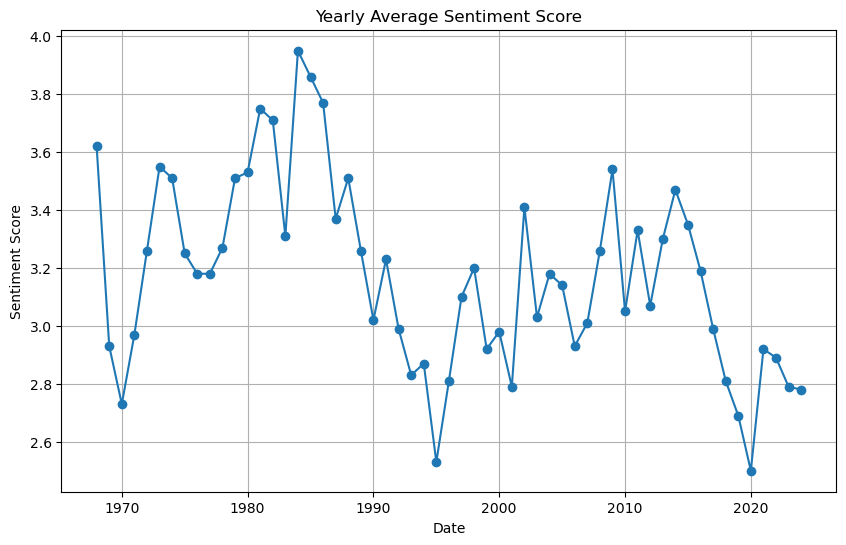

In [6]:
# 读取数据
with open('yearly_average_sentiment.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 将数据转换为DataFrame
df = pd.DataFrame(list(data.items()), columns=['date', 'sentiment_score'])
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 画出折线图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sentiment_score'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Yearly Average Sentiment Score')
plt.grid(True)
plt.show()


In [7]:
# 读取数据
with open('yearly_average_sentiment.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 将数据转换为DataFrame
df = pd.DataFrame(list(data.items()), columns=['date', 'sentiment_score'])
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

print(df.index.min(), df.index.max())

# 设定事件时间点
pre_period = ['1979-01-01', '1989-05-31']
post_period = ['1989-06-01', '1994-12-31']

# 准备数据
data = df['sentiment_score'].astype(float).to_frame()

# 调试信息
print(data.head())
print(data.describe())
print(f"Pre-period: {pre_period}")
print(f"Post-period: {post_period}")
print(data.loc[pre_period[0]:pre_period[1]])
print(data.loc[post_period[0]:post_period[1]])

# 创建CausalImpact对象并进行分析
ci = CausalImpact(data, pre_period, post_period)

# 检查ci.inferences是否为None
if ci.inferences is not None:
    print(ci.summary())
    print(ci.summary(output='report'))
    ci.plot()

    # 比较实际的每月的sentiment score和推断的分数的不同
    actual_vs_predicted = pd.DataFrame({
        'actual': ci.inferences['response'],
        'predicted': ci.inferences['predicted']
    })

    # 可视化
    plt.figure(figsize=(10, 6))
    plt.plot(actual_vs_predicted.index, actual_vs_predicted['actual'], label='Actual')
    plt.plot(actual_vs_predicted.index, actual_vs_predicted['predicted'], label='Predicted', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title('Actual vs Predicted Sentiment Score')
    plt.legend()
    plt.show()
else:
    print("CausalImpact analysis failed. ci.inferences is None.")
    actual_vs_predicted = pd.DataFrame({
        'actual': [],
        'predicted': []
    })
    print(actual_vs_predicted)

1968-01-01 00:00:00 2024-01-01 00:00:00
            sentiment_score
date                       
1968-01-01             3.62
1969-01-01             2.93
1970-01-01             2.73
1971-01-01             2.97
1972-01-01             3.26
       sentiment_score
count        57.000000
mean          3.173333
std           0.330197
min           2.500000
25%           2.930000
50%           3.180000
75%           3.370000
max           3.950000
Pre-period: ['1979-01-01', '1989-05-31']
Post-period: ['1989-06-01', '1994-12-31']
            sentiment_score
date                       
1979-01-01             3.51
1980-01-01             3.53
1981-01-01             3.75
1982-01-01             3.71
1983-01-01             3.31
1984-01-01             3.95
1985-01-01             3.86
1986-01-01             3.77
1987-01-01             3.37
1988-01-01             3.51
1989-01-01             3.26
            sentiment_score
date                       
1990-01-01             3.02
1991-01-01             3.2